In [1]:
# Import all the functions and liabries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import all the data
breast_df     = pd.read_csv('/content/breast-cancer.csv')
diabetes_df   = pd.read_csv('/content/diabetes-clf.csv')
german_df     = pd.read_csv('/content/german.csv')
haberman_df   = pd.read_csv('/content/haberman.csv')
heart_df      = pd.read_csv('/content/heart.csv')
ionosphere_df = pd.read_csv('/content/ionosphere.csv')
juvenile_df   = pd.read_csv('/content/juvenile.csv')
recidivism    = pd.read_csv('/content/recidivism.csv')

In [3]:
[' '.join(feature.split("_")[1:]) if len(feature.split("_")) > 1
            and feature != 'shrink_mode' and feature != 'sample_idx'\
            else feature for feature in breast_df.columns]

['shrink_mode',
 'sample_idx',
 'age',
 'tumor-size',
 'inv-nodes',
 'node-caps',
 'breast',
 'irradiat',
 'menopause 0.0',
 'menopause 1.0',
 'menopause 2.0',
 'breast-quad 0.0',
 'breast-quad 1.0',
 'breast-quad 2.0',
 'breast-quad 3.0',
 'breast-quad 4.0',
 'deg-malig 0.0',
 'deg-malig 1.0',
 'deg-malig 2.0',
 'replication']

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to modify column names
def modified(df):
    # Modify feature names by splitting and extracting the second part
    return [feature.split("_")[1] if len(feature.split("_")) > 1
            and feature != 'shrink_mode' and feature != 'sample_idx'
            else feature for feature in df.columns]

# Function to plot variability by feature and save as PDF
def plot_variability_by_feature(df, save_as_pdf=False, pdf_filename="plot.pdf"):
    # Rename column names using the modified function
    df.columns = modified(df)

    # Assuming your dataset is stored in a DataFrame called 'df'
    # Let's say your DataFrame is named 'data'
    id_vars = df.loc[:, ['shrink_mode', 'sample_idx', 'replication']]
    df1 = df.copy()

    # Drop columns 'shrink_mode', 'sample_idx', 'replication' for analysis
    df1.drop(['shrink_mode', 'sample_idx', 'replication'], axis=1, inplace=True)

    # Get the column names for further analysis
    value_bars = df1.columns

    # Melt the DataFrame to long format
    data_long = pd.melt(df, id_vars=id_vars,
                        value_vars=value_bars,
                        var_name='feature', value_name='variability')

    # Now, you have the data in long format, and you can group it by 'shrink_mode' and 'feature' to compute the variance
    grouped_data = data_long.groupby(['shrink_mode', 'feature'])['variability'].var().reset_index()

    # Define a custom color palette
    custom_palette = sns.color_palette("Set1", len(grouped_data['shrink_mode'].unique()))

    # Set the style and color palette
    sns.set(style="whitegrid", palette=custom_palette)

    # Create a bar plot
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

    # Use Seaborn to create a bar plot (you can also use pure Matplotlib)
    ax = sns.barplot(data=grouped_data, x='feature', y='variability', hue='shrink_mode')

    # Add labels and title
    plt.xlabel('Feature')
    plt.ylabel('Variability (Variance)')
    plt.title('Variability of Shrink Modes by Feature')

    # Rotate x-axis labels for better readability (optional)
    plt.xticks(rotation=45)

    # Show the legend
    plt.legend(title='Shrink Mode', title_fontsize='12', loc='upper right')

    # Remove y-axis label
    ax.set(ylabel='')

    # Save the plot as a PDF if save_as_pdf is True
    if save_as_pdf:
        plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')

    # Display the plot
    plt.show()

#breast_df

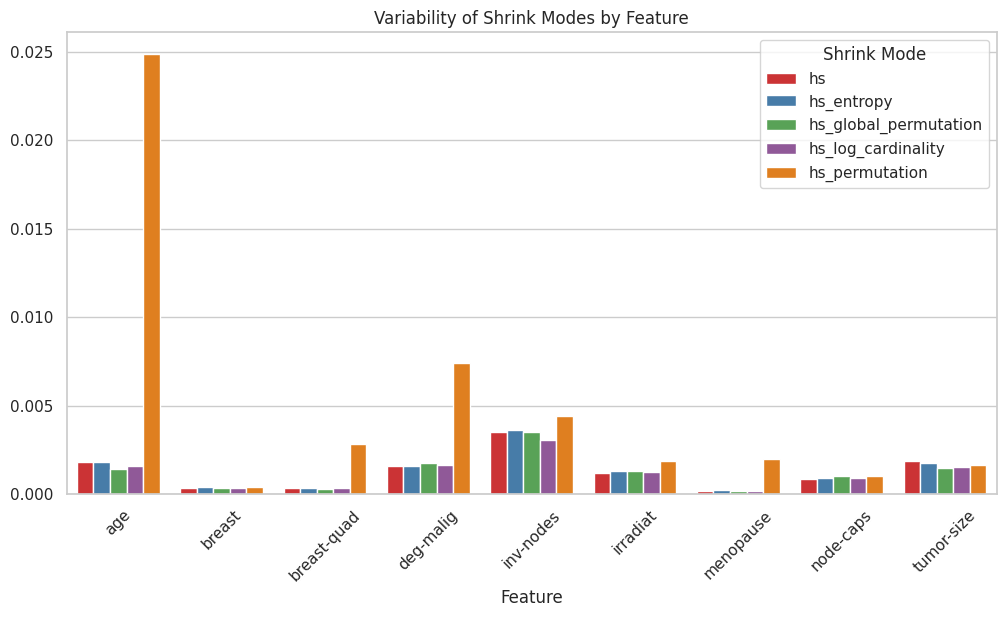

In [5]:
if __name__ == "__main__":
  plot_variability_by_feature(breast_df)

#diabetes_df

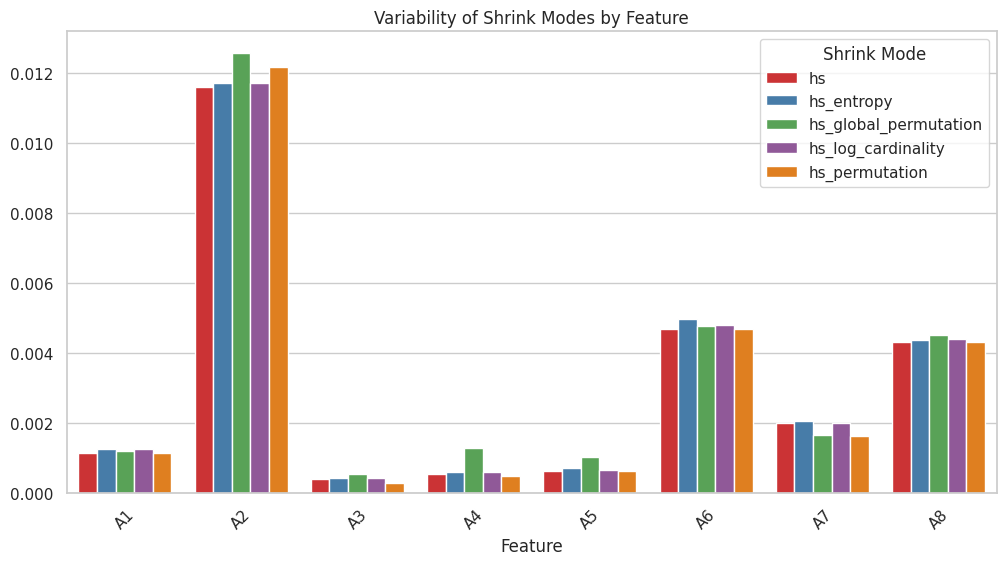

In [6]:
if __name__ == "__main__":
  plot_variability_by_feature(diabetes_df)

#german_df

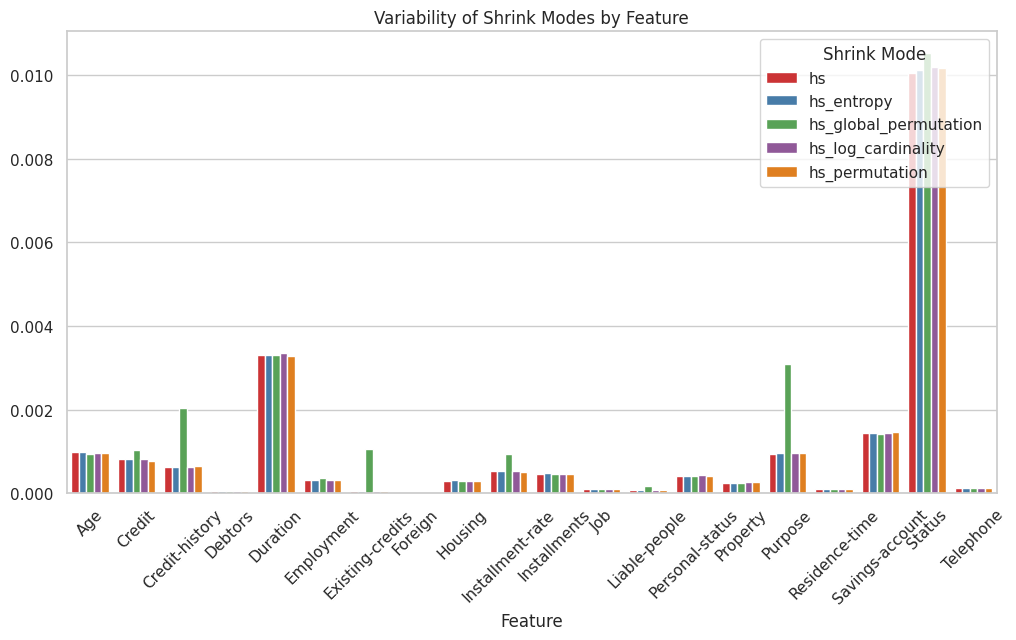

In [7]:
if __name__ == "__main__":
  plot_variability_by_feature(german_df)

#haberman_df

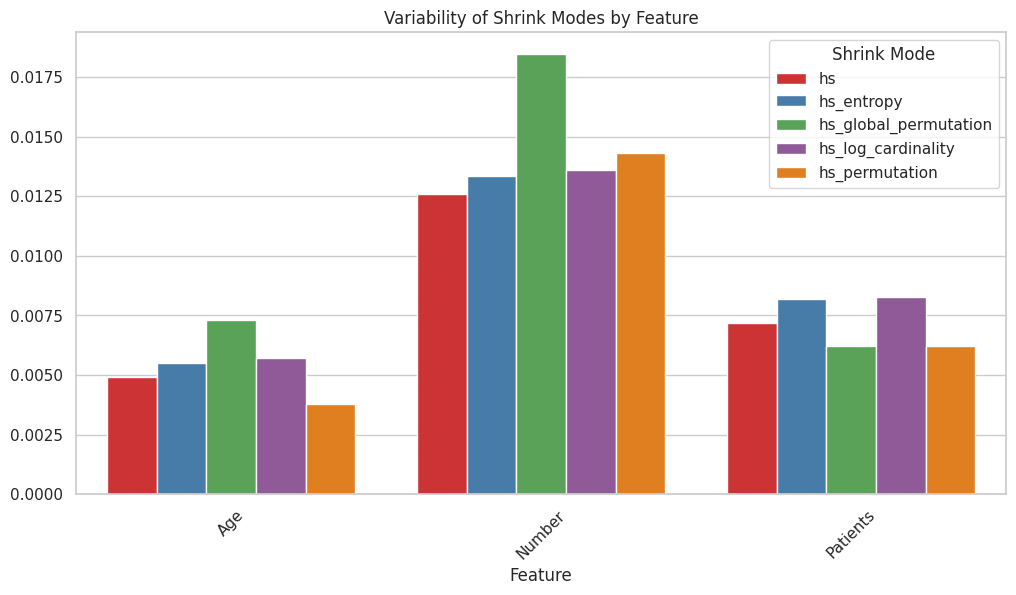

In [8]:
if __name__ == "__main__":
  plot_variability_by_feature(haberman_df)

In [9]:
heart_df.head()

,shrink_mode,sample_idx,SHAP_att_1,SHAP_att_2,SHAP_att_3,SHAP_att_4,SHAP_att_5,SHAP_att_6,SHAP_att_7,SHAP_att_8,SHAP_att_9,SHAP_att_10,SHAP_att_11,SHAP_att_12,SHAP_att_13_-1.0,SHAP_att_13_0.5,SHAP_att_13_1.0,replication
0,hs,0,0.010007,0.004231,-0.058672,-0.010655,0.002028,0.000302,0.003344,0.044295,-0.004404,-0.004785,-0.000249,0.017506,0.039940,-0.000314,0.029736,0
1,hs,1,-0.013699,-0.002506,-0.059405,-0.002343,-0.004813,-0.000305,-0.004300,0.041694,0.007914,0.037281,0.000232,0.017839,0.027017,0.000273,0.028472,0
2,hs,2,-0.020995,0.009090,-0.061749,-0.007497,-0.040822,-0.000299,-0.003715,0.009124,0.008146,0.015083,0.000237,0.015997,0.026484,0.000168,0.026563,0
3,hs,3,0.009851,0.006968,0.063526,0.006717,0.002228,-0.000118,-0.004404,0.025162,-0.018202,0.040707,0.000469,0.016057,0.030989,0.000408,0.026588,0
4,hs,4,-0.013684,0.007752,0.054649,-0.006092,0.007117,-0.000167,0.004340,0.029432,0.006764,0.042789,0.000381,-0.041380,0.032689,0.000410,0.027158,0


#recidivism

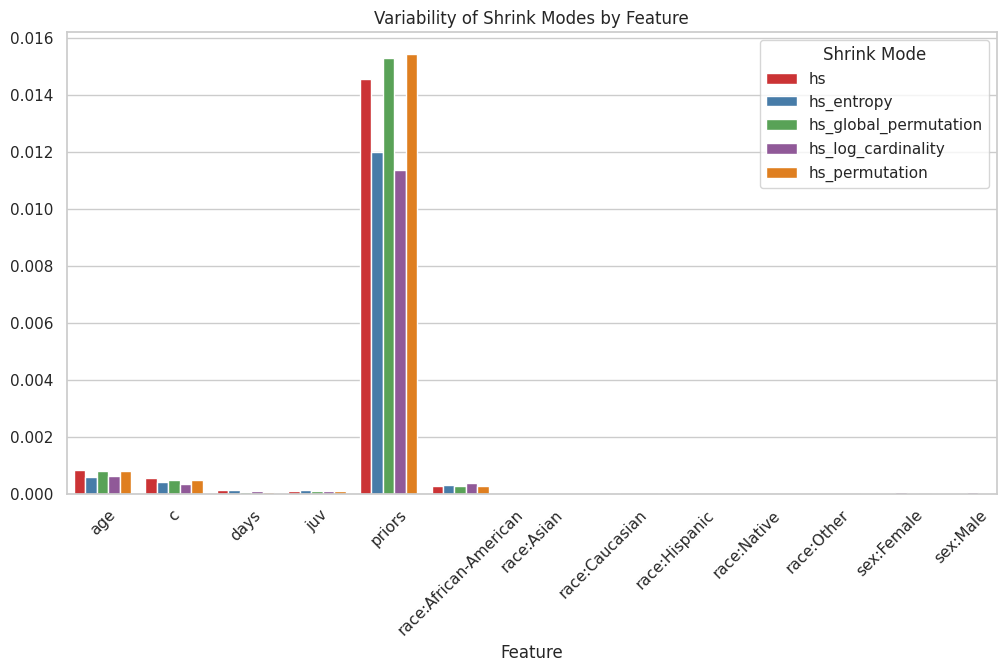

In [11]:
if __name__ == "__main__":
  plot_variability_by_feature(recidivism)